In [6]:
#! Required python packages: numpy, scipy, scikit-learn, matplotlib, seaborn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exercice 2

In [7]:
import numpy as np
theta = np.array([0, 1]).reshape(-1, 1)
y = np.array([1, 1, 0]).reshape(-1, 1)
X = np.array([[2, 1],[0, -1], [1, 2]])

# Mean Squared Error
def MSE(theta, X, y):
    return np.mean((np.dot(X, theta) - y)**2)

y = np.array([2, 0, 1]).reshape(-1, 1)
X = np.array([[0, 1],[1, -1], [2, 1]])

np.linalg.inv(X.T@X)@X.T@y

array([[0.21428571],
       [0.92857143]])

[[0.5]]
[[0.73105858]]


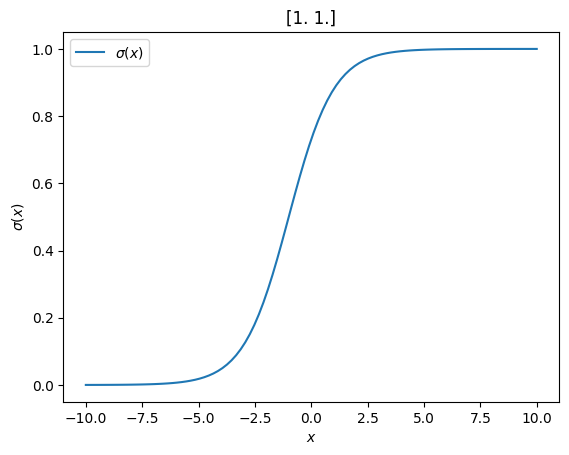

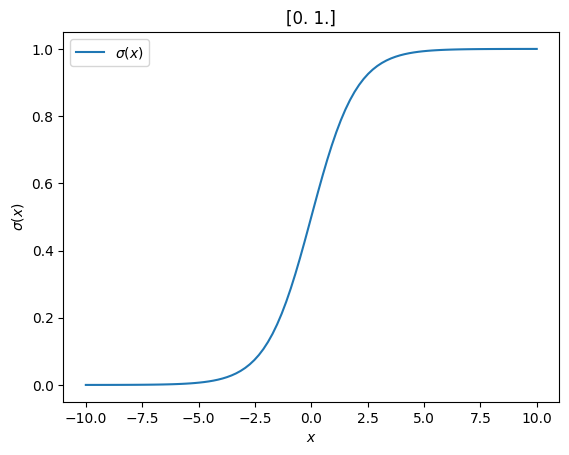

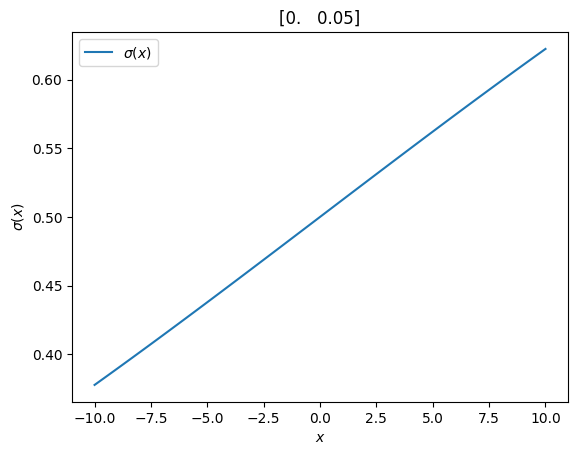

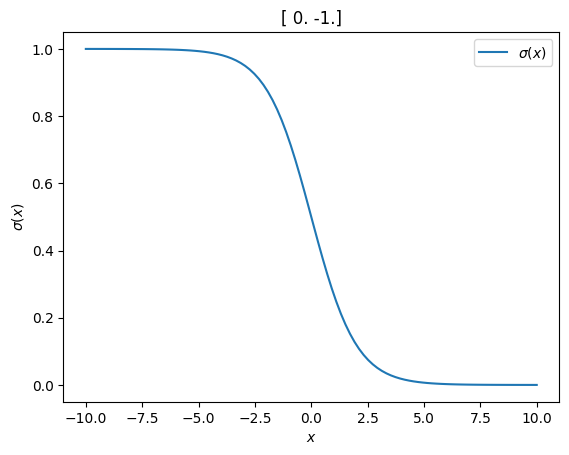

In [8]:
x = np.stack((np.ones(100), np.linspace(-10, 10, 100)), axis = -1)
thetas = np.array([[1, 1], [0, 1], [0, 0.05], [0, -1]])


def sigma(x, theta) :
    return 1 / (1 + np.exp(-theta.T @ x))

print(sigma(np.array([1, 0]).reshape(-1, 1), np.array([0, 1]).reshape(-1, 1)))
print(sigma(np.array([1, 0]).reshape(-1, 1), np.array([1, 1]).reshape(-1, 1)))

# Plot the sigmoid function
plt.figure()
for theta in thetas :
    plt.plot(x[:, 1], sigma(x.T, theta.reshape(-1, 1))[0], label = r'$\sigma(x)$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$\sigma(x)$')
    plt.title(f'{theta}')
    plt.legend()
    plt.show()


In [9]:
theta = np.array([-1.3, 2.8, 0.1]).reshape(-1, 1)
x = np.array([1, -7, 7])

theta.T @ x

array([-20.2])

In [10]:
C = 2

n=20


def hinge_loss(x, y, theta) :
    return max(0, 1- y*(theta.T@x))



theta = np.array([-6, 3, 2]).reshape(-1, 1)
x_a = np.array([1, 1/2, 1]).reshape(-1, 1)
x_b = np.array([1, 1, 1/2]).reshape(-1, 1)
x_c = np.array([1, 4/3, 1]).reshape(-1, 1)
x_d = np.array([1, 2, 1]).reshape(-1, 1)
x_e = np.array([1, 3, 1]).reshape(-1, 1)

print(hinge_loss(x_a, 1, theta))
print(hinge_loss(x_b, 1, theta))
print(hinge_loss(x_c, -1, theta))
print(hinge_loss(x_d, -1, theta))
print(hinge_loss(x_e, 1, theta))

[[3.5]]
[[3.]]
[[1.]]
[[3]]
0


# Exercice 3

In [11]:
def get_precision_recall(FN, TP, FP):
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    return precision, recall

TP = 27
FP = 10
TN = 143
FN = 1

precision, recall = get_precision_recall(FN, TP, FP)

# F1 score
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.8307692307692307

In [12]:
import numpy as np
theta = np.array([3, 2]).reshape(-1, 1)
y = np.array([1, -1, 0]).reshape(-1, 1)
X = np.array([[2, 0],[-1, -1], [0, 1]])

# Mean Squared Error ridge
def MSE(theta, X, y, alpha):
    return np.mean((np.dot(X, theta) - y)**2) + alpha*np.dot(theta.T, theta)

MSE(theta, X, y, 1)


array([[28.]])

In [13]:
80+12+35+55

182

In [14]:
80/92-35/90


0.48067632850241543

# Exercice 4

In [15]:
# update rule
def get_activation(x, W, b, a) :
    z = W @ x + b
    a = a(z)
    return z, a

def convolution(X, W) :
    (m, n) = X.shape
    (p, q) = W.shape
    z = np.zeros((m-p+1, n-q+1))
    for i in range(m-p+1) :
        for j in range(n-q+1) :
            z[i, j] = np.sum(X[i:i+p, j:j+q]*W)
    return z

# backward pass
def calculate_g_L(y, a, z):
  dy_hat = dloss_dyhat(a, y)
  return dy_hat.T @ np.diag(sigmoid_prime(z).squeeze())

def calculate_g_l(g_l_previous, layer_weight_previous, z):
  g_l = (g_l_previous @ layer_weight_previous) @ np.diag(sigmoid_prime(z).squeeze())
  return g_l

def calculate_nabla_bias(g_l):
  return g_l.T

def calculate_nabla_weight(g_l, a_next):
  return g_l.T @ a_next.T

# loss function
def loss_fn(y_hat, y):
  """
  This is the MSE loss for a single sample.
  """
  return np.sum((y_hat - y)**2)


def dloss_dyhat(y_hat, y):
  """
  Gradient of the MSE loss for a single sample.
  """
  return 2*(y_hat - y)

# activation functions
def relu(x) :
    return np.maximum(0, x)

def tanh(x) :
    return np.tanh(x)

def sigmoid(x) :
    return 1/(1+np.exp(-x))

def sigmoid_prime(z):
  """
  $\sigma\prime$ in the lecture notes
  """
  return sigmoid(z)*(1-sigmoid(z))

def identity(x) :
    return x

def softmax(x) :
    return np.exp(x)/np.sum(np.exp(x))

In [16]:
X = np.array([
    [2],
    [4]
])

W = np.array([
    [1, 0.5],
    [0.5, -1],
    [-2, 0]
])

b = np.array([1, -0.5, 2]).reshape(-1, 1)

z_l, a_l = get_activation(X, W, b, relu)

W_2 = np.array([-1, 2, -2])
b_2 = np.array([4])
z_2, a_2 = get_activation(a_l, W_2, b_2, tanh)
print(a_2)

[-0.76159416]


In [17]:
W = np.array([1, 1, 4, 2])
b = np.array([-1])

x = np.array([-1, 2, 0, 1])

z, a = get_activation(x, W, b, identity)
a

array([2])

In [18]:
W_1 = np.array([
    [1, 1, 0],
    [-1, 1, 2],
])

b_1 = np.array([1, 3]).reshape(-1, 1)

W_2 = np.array([
    [1, 1],
    [-1, -1],
])

b_2 = np.array([2, 2]).reshape(-1, 1)

x = np.array([1, 2, -3]).reshape(-1, 1) 

z_1, a_1 = get_activation(x, W_1, b_1, relu)
z_2, a_2 = get_activation(a_1, W_2, b_2, relu)

z_2

array([[ 6],
       [-2]])

In [19]:
W_1 = np.array([
    [1, 0, 1],
    [2, 1, -1],
])

b_1 = np.array([0, -2]).reshape(-1, 1)

W_2 = np.array([
    [4, 1],
    [-1, 0],
])

b_2 = np.array([1, -1]).reshape(-1, 1)

W_3 = np.array([1, -2])
b_3 = np.array([0])

x = np.array([1, 2, 1]).reshape(-1, 1) 

z_1, a_1 = get_activation(x, W_1, b_1, relu)
z_2, a_2 = get_activation(a_1, W_2, b_2, sigmoid)
z_3, a_3 = get_activation(a_2, W_3, b_3, sigmoid)

a_3

array([0.71199701])

In [20]:
W = np.array([2, 2])
b = np.array([0])

a_2 = np.array([1, -1]).reshape(-1, 1) 

z_3, a_3 = get_activation(a_2, W, b, sigmoid)

y = np.array([1])
print(a_3)

def calculate_g_L_1_D(y, a, z):
  dy_hat = dloss_dyhat(a, y)
  return dy_hat.T @ sigmoid_prime(z)

calculate_g_L_1_D(y, a_3, z_3)

[0.5]


-0.25

In [21]:
X = np.array([
    [0, 0, 2, 1, 0],
    [3, 1, 2, 0, 0],
    [0, 0, 1, 2, 3],
    [1, 1, 0, 2, 1],
    [3, 1, 0, 0, 0]
])

W = np.array([
    [2, 0, 1],
    [1, 1, 0],
    [1, 2, 1]
])

convolution(X, W)

array([[ 7.,  8., 14.],
       [11.,  6., 12.],
       [ 8.,  4.,  7.]])

In [22]:
W = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
b = np.array([[0],[0],[0]])

X = np.array([
    [1, 2, 1, 1, 0],
    [1, 0, 0, 1, 0],
    [0, 1, 1, 2, 0],
    [1, 1, 1, 0, 0],
    [0, 1, 0, 1, 1]
])

z = convolution(X, W)

print(z)

[[ 0.  1. -2.]
 [ 0.  1. -2.]
 [ 1.  0. -1.]]


In [23]:
a_1 = np.array([1, -1]).reshape(-1, 1)
W_2 = np.array([
    [2, 1],
    [-1, 0]
])
b_2 = np.array([3, 1]).reshape(-1, 1)

z_2, r_2 = get_activation(a_1, W_2, b_2, relu)

print(r_2 + a_1)

[[ 5]
 [-1]]


In [24]:
X = [
    np.array([1, 0, 2]).reshape(-1, 1),
    np.array([1, 1, 0]).reshape(-1, 1),
    np.array([-1, -1, 0]).reshape(-1, 1),
    np.array([1, 1, 1]).reshape(-1, 1),
    np.array([0, 1, 0]).reshape(-1, 1),
]

W = np.array([[1, 2, -1], [-1, 1, 0]])

b = np.array([0, 1]).reshape(-1, 1)

Z = np.array([get_activation(x, W, b, relu)[0] for x in X])

np.mean(Z, axis = 0)

array([[0.6],
       [1. ]])

In [25]:
g_3 = -0.0776
g_3 = np.array([g_3])
W_3 = np.array([1, 1]).reshape(1, -1)
b_3 = np.array([0])

W_2 = np.array([
    [1, 1],
    [1, 1],
])
b_2 = np.array([0, 0]).reshape(-1, 1)

W_1 = np.array([
    [1, 1, 1],
    [1, 1, 1],
])
b_1 = np.array([0, 0]).reshape(-1, 1)

x = np.array([0, 0, 0]).reshape(-1, 1)
y = np.array([1])

print(g_3.shape, W_3.shape, (np.array([1, 1]).reshape(-1, 1)).shape)
g_2 = calculate_g_l(g_3, W_3, np.array([1, 1]).reshape(-1, 1))
g_1 = calculate_g_l(g_2, W_2, np.array([0, 0]).reshape(-1, 1))

print(g_1[0]/g_3)

(1,) (1, 2) (2, 1)
[0.09830597]


In [26]:
y = np.array([1])
y_hat = np.array([2])
a_2 = np.array([4, 1]).reshape(-1, 1)
g_3 = np.array([1/2])


nabla_bias_3 = calculate_nabla_bias(g_3)
nabla_weight_3 = calculate_nabla_weight(g_3, a_2)

print(nabla_bias_3)
print(nabla_weight_3)

[0.5]
[2.  0.5]


In [27]:
# forward
a_1 = np.array([1, 2]).reshape(-1, 1)
z_2 = np.array([0, 0]).reshape(-1, 1)
a_2 = sigmoid(z_2)

# backward
g_3 = np.array([-1])
W_3 = np.array([-4, 2]).reshape(1, -1)
g_2 = calculate_g_l(g_3, W_3, z_2).reshape(1, -1)

nabla_bias_2 = calculate_nabla_bias(g_2)
nabla_weight_2 = calculate_nabla_weight(g_2, a_1)

print(nabla_bias_2)
print(nabla_weight_2)

[[ 1. ]
 [-0.5]]
[[ 1.   2. ]
 [-0.5 -1. ]]


In [28]:
W_1 = np.array([[1, 1], [-1, 0], [2, 1]])
b_1 = np.array([1, 0, 0]).reshape(-1, 1)

W_2 = np.array([[1, 0, -2]]).reshape(1, -1)
b_2 = np.array([0]).reshape(-1, 1)

x = np.array([1, 1]).reshape(-1, 1)
y = np.array([1]).reshape(-1, 1)

# forward
a_1, z_1 = get_activation(x, W_1, b_1, relu)
a_2, z_2 = get_activation(a_1, W_2, b_2, sigmoid)

#backward
g_2 = calculate_g_L_1_D(y, a_2, z_2)
nabla_bias_2 = calculate_nabla_bias(g_2)
nabla_weight_2 = calculate_nabla_weight(g_2, a_1)

#update
W_2 = W_2 - 0.1*nabla_weight_2
b_2 = b_2 - 0.1*nabla_bias_2

print(W_2)
print(b_2)

[[ 1.59966274 -0.19988758 -1.40033726]]
[[0.19988758]]


In [29]:
import numpy as np

np.exp(14.6548E3/(8.314*293))

409.90392838521234

### Exam

In [30]:
import numpy as np

In [37]:
X = np.array([2, -1, 1]).reshape(-1, 1)

W_1 = np.array([[1, 0, 2],
                [-1, 1, 0]
            ])
b_1 = np.array([-1, 2]).reshape(-1, 1)

W_2 = np.array([[1, -1], 
                [0, 1]]
            )
b_2 = np.array([-1, -1]).reshape(-1, 1)

z_1, a_1 = get_activation(X, W_1, b_1, relu)
z_2, a_2 = get_activation(a_1, W_2, b_2, relu)

print(z_2)

[[ 2]
 [-1]]


In [40]:
# forward
W_3 = np.array([[2, 1]])
b_3 = np.array([1]).reshape(-1, 1)
y = np.array([0]).reshape(-1, 1)

a_2 = np.array([-1, 1]).reshape(-1, 1)
z_3, a_3 = get_activation(a_2, W_3, b_3, sigmoid)

# backward
g_3 = calculate_g_L_1_D(y, a_3, z_3)
print(g_3)

[[0.25]]


In [45]:
a_1 = np.array([-1, 1]).reshape(-1, 1)
W_1 = np.array([[1, 1], [0, 2]])
b_1 = np.array([-1, 0]).reshape(-1, 1)

z_2, r = get_activation(a_1, W_1, b_1, relu)
print(z_2)
print(r)
print(r + a_1)


[[-1]
 [ 2]]
[[0]
 [2]]
[[-1]
 [ 3]]


In [48]:
X = np.array([-1, 1, 2, -2]).reshape(-1, 1)
W_1 = np.array([[3, 4, -1, 1]])
b_1 = np.array([2]).reshape(-1, 1)

z_2, a_2 = get_activation(X, W_1, b_1, relu)
a_2

array([[0]])

In [1]:
(8/0.8)**2.5

316.22776601683796

# Exercise 7

In [1]:
import numpy as np

In [3]:
x = np.array([1.3, 2.9, 4.7])
lbda = 5.1

def exp_distrib (x, lbda) :
    return lbda * np.exp(-lbda * x)

def log_likelihood(x, lbda) :
    return np.sum(np.log(exp_distrib(x, lbda)))

log_likelihood(x, lbda)

-40.50227838080916

# Exercise 8

In [6]:
import numpy as np
3/4 * np.log2(3/2) + 1/4 * np.log2(1/2)

0.18872187554086717

In [7]:
-np.log2(1/7)

2.807354922057604

In [4]:
import numpy as np

def P(x, k) :
    if (x <= k) :
        return 2 * x /(k*(k+1))
    else :
        return 0

L = 0
x_s = [3, 4, 5]
k = 5

for x in x_s :
    L += np.log(P(x, k))

print(L)

L2 = 0
x_s = [4, 4, 4]
k = 7

for x in x_s :
    L2 += np.log(P(x, k))

print(L2)
    
    

-4.029806041084529
-5.83773044716594


In [6]:
import numpy as np
def p(x, lbda) :
    return (lbda * np.exp(-lbda * x))

x_s = [2.5, 4, 5]
lbda = 4.3
L = 0

for x in x_s :
    L += np.log(p(x, lbda))

print(L)

-45.07415493190145
